In [2]:
from Jeans import Jeans_Solver,f
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import scipy.constants as cs

## Jean's Equation
reference paper: 1311.6524v2  
The original Jean's Equation (using Poisson's Equation) is Eqn (1) in the paper.  
First, we assume spherical symmetry of the solution to Jean's Equation. We also use Hernquist density profile for the Baryon density distribution in the galaxy:  
$$\rho_B(r) = \frac{\rho_{B0}r0^4}{r(r+r_0)^3}$$  
where $r_0$ is the Hernquist scale radius. 
Thus, using Poisson Equation:  
$$\frac{1}{r^2}\frac{\partial}{\partial r}(r^2\frac{\partial \Phi_B}{\partial r}) = 4\pi G \rho_B $$    
and boundary condition:  
$$\Phi_B(0) = -2\pi G\rho_{B0}r_0^2$$  
Solving the PDE using this boundary condition we can get:  
$$\Phi_B(r) = -\frac{2\pi \rho_{B0} G r_0^3}{r+r_o}$$  

## Numerically solving Jean's Equation
Now, we use scipy to numerically solve Jean's Equation under those assumptions.
The Equation essentially becomes Eqn (4) in the paper.  
$$\frac{1}{y}\frac{d}{dy}[y^2\frac{d}{dy}h(y)]+\frac{2 a_1}{y} +\frac{a_0}{(1-y)^4}\exp[h(y)]=0$$  
$$a_0 = 4\pi G \rho_0 r_0^2 \sigma^2$$  
$$a_1 = -\Phi_B(0)/ \sigma_0^2 = 2 \pi G \rho_{B0} r_0^2/\sigma_0^2$$  
We also computed the core radius:
core radius is the position where the density falls by a factor of 2.  
Within the core region, the core radius can be approximated as follows:  
$$r_c\approx r_0\frac{\sqrt{1+(2/3)\ln(2)a_0 / a_1^2} -1}{1+a_0 / (3a_1)-\sqrt{1+(2/3)\ln(2)a_0/a_1^2}}$$  
We first solve with two sets of constants.
1. Adiabatically contracted NFW profile
Set of constants used:  
$r_0 = 2.7 \text{ kpc, }\rho_0 = 80 \text{ GeV/cm}^3 \text{, } \sigma_0 = 165 \text{km/s, } \Phi_B(0) = -365^2 \text{ km}^2/\text{s}^2$  
The core radius is an okay approximation. 

In [19]:
# Adiabatic 
rho0 = 80 # GeV/cm^3
r0 = 2.7 # kpc 
sigma0 = 165 # km/s
Phi_b0 = 365**2 # km/s
r, rho_adiabatic = Jeans_Solver(rho0,r0,sigma0,Phi_b0) 
# core radius
rc_adiabatic_index = np.argmin(np.abs(rho_adiabatic[0]/rho_adiabatic - 2.00))
print('rc Numerical:', r[rc_adiabatic_index])
print ('to verify:',rho_adiabatic[0], rho_adiabatic[rc_adiabatic_index])
a0 = 30.05
a1 = 4.89
rc = r0*(np.sqrt(1+(2/3)*np.log(2)*a0/a1**2)-1)/(1+a0/(3*a1)-np.sqrt(1+(2/3)*np.log(2)*a0/a1))
print('rc Approximation:', rc)

a0: 30.500245325268267
a1: 4.893480257116621
rc Numerical: 0.389951969443259
to verify: 80.0 40.00080070190886
rc Approximation: 0.6379101276587114


2. Non-adiabatically contracted NFW profile
Set of constants used:  
$r_0 = 2.7 \text{ kpc, }\rho_0 = 14 \text{ GeV/cm}^3 \text{, } \sigma_0 = 165 \text{km/s ,} \Phi_B(0) = -365^2 \text{ km}^2/\text{s}^2$  
The core radius is an okay approximation.

In [17]:
# Non-adiabatic
rho0 = 14 # GeV/cm^3
r0 = 2.7 # kpc
sigma0 = 165 # km/s
Phi_b0 = 365**2 # km/s
r, rho_nonadiabatic = Jeans_Solver(rho0,r0,sigma0,Phi_b0)

# core radius
rc_nonadiabatic_index = np.argmin(np.abs(rho_nonadiabatic[0]/rho_nonadiabatic - 2.00))
print('rc Numerical', r[rc_nonadiabatic_index])
print ('to verify:',rho_nonadiabatic[0], rho_nonadiabatic[rc_nonadiabatic_index])
a0 = 5.25
a1 = 4.89
rc = r0*(np.sqrt(1+(2/3)*np.log(2)*a0/a1**2)-1)/(1+a0/(3*a1)-np.sqrt(1+(2/3)*np.log(2)*a0/a1))
print('rc Approximation:', rc)

a0: 5.337542931921947
a1: 4.893480257116621
rc Numerical 0.43370477174680566
to verify: 14.0 6.998247294969634
rc Approximation: 0.9921498125179109


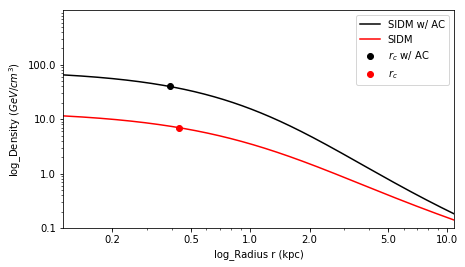

In [5]:
# Plot the solution
fig = plt.figure(1, figsize=(7,4))
beg = 400
end = 8000
ax1 = fig.add_subplot(111)
ax1.loglog(r[beg:end],rho_adiabatic[beg:end],label = 'SIDM w/ AC',color = 'k')
ax1.loglog(r[beg:end],rho_nonadiabatic[beg:end],label = 'SIDM',color = 'r')
ax1.loglog(r[rc_adiabatic_index],rho_adiabatic[rc_adiabatic_index],'o',color = 'k',label= r'$r_c$ w/ AC')
ax1.loglog(r[rc_nonadiabatic_index],rho_nonadiabatic[rc_nonadiabatic_index],'o',color = 'r',label= r'$r_c$')

ax1.set_xlabel(r'log_Radius r (kpc)')
ax1.set_ylabel(r'log_Density $(GeV/cm^3)$')
ax1.legend()
ax1.set_xticks([0.2,0.5,1.0,2.0,5.0,10.0])
ax1.set_yticks([0.1,1.0,10,100])
ax1.set_ylim([0.1,1000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.autoscale(enable=True, axis='x', tight=True)
#plt.autoscale(enable=True, axis='y', tight=True)
plt.show()

## Jean's Equation in Various limits
We explore Jean's Equation in two limits: when the baryon dominate (the core is just set by the baryonic potential) and when the baryon are not dynamically important (self-gravitating isothermal sphere)
1. When Baryon dominate
It means that $a_0 \sim O(1)$ and $a_1$ is large.
We used the following parameters:
$r_0 = 2.7 \text{ kpc, }\rho_0 = 2.7 \text{ GeV/cm}^3 \text{, } \sigma_0 = 165 \text{km/s, } \Phi_B(0) = -600^2 \text{ km}^2/\text{s}^2$  
We first numerically solved the PDE. Then we also compared the numerical solution to the analytical one, shown below:  $$\rho(\vec{r}) = \rho_0 \exp\lbrace [ \Phi_B(0) -\Phi_B(\vec{r}) ] /\sigma_0^2\rbrace$$  
We can see from the following plot that the two solutions look identical. 
Furthermore, the core radius $r_c$ under such assumption becomes:  
$$r_c\approx r_0\ln(2)/[a_1-\ln(2)]$$
We also verified explicitly that this approximations agrees with the numerical solution


In [6]:
# in the limit when baryon dominate
#a0~O(1), a1~large
rho0 = 2.7 # GeV/cm^3
r0 = 2.7 # kpc
sigma0 = 165 # km/s
Phi_b0 = 600**2 # km^2/s^2
# calculate rho_bo according to Phi_b(0):
rho_b0 = (600**2/(r0*3.08567758128e16)**2)/(2*np.pi*cs.G)
print(rho_b0)
# analytical solution
def Phi_b(r, r0, rho_b0):
    #r0 = r0*3.08567758128e16
    #r = r*3.08567758128e16
    return -2.*np.pi*cs.G*rho_b0*(r0**3/(r+r0))*(3.08567758128e16)**2
r, rho_baryon = Jeans_Solver(rho0,r0,sigma0,Phi_b0)
rho_analytic = rho0*np.exp((Phi_b(0.,r0,rho_b0) - Phi_b(r,r0,rho_b0))/sigma0**2)

# core radius
rc_baryon_index = np.argmin(np.abs(rho_baryon[0]/rho_baryon - 2.00))
print('Numerical', r[rc_baryon_index])
print ('Verify:',rho_baryon[0], rho_baryon[rc_baryon_index])
a0 = 1.01
a1 = 13.22
rc = r0*np.log(2)/(a1-np.log(2))
print('Approximation:', rc)

1.2368089110207762e-19
a0: 1.0293832797278042
a1: 13.223140495867769
Numerical 0.14930353365664348
Verify: 2.7 1.34984064435895
Approximation: 0.149398848576518


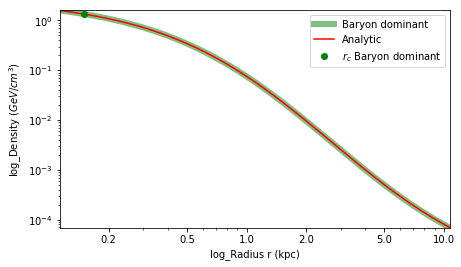

In [13]:
# Plot the solution
fig = plt.figure(1, figsize=(7,4))
beg = 400
end = 8000
ax1 = fig.add_subplot(111)
ax1.loglog(r[beg:end],rho_baryon[beg:end],label = 'Baryon dominant',color = 'g',linewidth = 6, alpha = 0.5)
ax1.loglog(r[beg:end],rho_analytic[beg:end],label = 'Analytic',color = 'r')
ax1.loglog(r[rc_baryon_index],rho_baryon[rc_baryon_index],'o',color = 'g',label= r'$r_c$ Baryon dominant')
ax1.set_xlabel(r'log_Radius r (kpc)')
ax1.set_ylabel(r'log_Density $(GeV/cm^3)$')
ax1.legend()
ax1.set_xticks([0.2,0.5,1.0,2.0,5.0,10.0])
ax1.set_yticks([0.0001,0.001,0.01,0.1,1,10])
#ax1.set_ylim([0.1,1000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.show()

2. When Baryon do not dominate
It means that $\rho_{B0} = 0$, in other words $a_1 = \Phi_B(\vec{r}) = 0$.
We used the following parameters:
$r_0 = 2.7 \text{ kpc, }\rho_0 = 80 \text{ GeV/cm}^3 \text{, } \sigma_0 = 165 \text{km/s, } \Phi_B(0) = 0 \text{ km}^2/\text{s}^2$ 
We first numerically solved the PDE.
Furthermore, the core radius $r_c$ under such assumption becomes:  
$$r_c\approx r_0\sqrt{6 \ln(2)/a_0}$$  
We also verified explicitly that this approximations agrees with the numerical solution

In [9]:
# in the limit when baryon do not dominate
# rho_b0 = 0
rho0 = 80 # GeV/cm^3
r0 = 2.7 # kpc
sigma0 = 165 # km/s
Phi_b0 = 0. # km/s
# analytical solution
r, rho_SIDM = Jeans_Solver(rho0,r0,sigma0,Phi_b0)

# core radius
rc_SIDM_index = np.argmin(np.abs(rho_SIDM[0]/rho_SIDM - 2.00))
print('Numerical', r[rc_SIDM_index])
print ('Verify:',rho_SIDM[0], rho_SIDM[rc_SIDM_index])
a0 = 30.05
a1 = 0.0
rc = r0*(np.sqrt(6*np.log(2)/a0))
print('Approximation:', rc)

a0: 30.500245325268267
a1: 0.0
Numerical 1.111944145304873
Verify: 80.0 40.003009836643656
Approximation: 1.0044536047935526


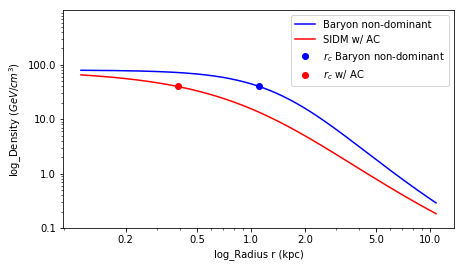

In [10]:
# Plot the solution
fig = plt.figure(1, figsize=(7,4))
beg = 400
end = 8000
ax1 = fig.add_subplot(111)
ax1.loglog(r[beg:end],rho_SIDM[beg:end],label = 'Baryon non-dominant',color = 'b')
ax1.loglog(r[beg:end],rho_adiabatic[beg:end],label = 'SIDM w/ AC',color = 'r')
ax1.loglog(r[rc_SIDM_index],rho_SIDM[rc_SIDM_index],'o',color = 'b',label= r'$r_c$ Baryon non-dominant')
ax1.loglog(r[rc_adiabatic_index],rho_adiabatic[rc_adiabatic_index],'o',color = 'r',label= r'$r_c$ w/ AC')

ax1.set_xlabel(r'log_Radius r (kpc)')
ax1.set_ylabel(r'log_Density $(GeV/cm^3)$')
ax1.legend()
ax1.set_xticks([0.2,0.5,1.0,2.0,5.0,10.0])
ax1.set_yticks([0.1,1.0,10,100])
ax1.set_ylim([0.1,1000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.autoscale(enable=True, axis='x', tight=True)
#plt.autoscale(enable=True, axis='y', tight=True)
plt.show()